In [7]:
import numpy as np #tinh toan
import pandas as pd #xu li bang
import seaborn as sns #do thi du lieu
import matplotlib.pyplot as plt # ve
from sklearn.preprocessing import StandardScaler # xu li xu lieu cho dong deu
from sklearn.model_selection import train_test_split # chia du lieu
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM # nhom chuan
from keras.models import Sequential #
from tensorflow.keras.utils import to_categorical #### chỉ cho 1 giá trị (1) hiện lên
from keras import callbacks #
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score,f1_score # đo lường
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from tensorflow.keras.optimizers import SGD,Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
import os

In [8]:
url='/content/drive/MyDrive/fruits'
generator= ImageDataGenerator(rescale=1./255,validation_split=0.1)
train_data=generator.flow_from_directory(url,target_size=(150,150),batch_size=128,class_mode='categorical',subset='training')
validation_dataset=generator.flow_from_directory(url,target_size=(150,150),batch_size=128,class_mode='categorical',subset='validation')
validation_dataset.class_indices

Found 4553 images belonging to 10 classes.
Found 503 images belonging to 10 classes.


{'Apple Braeburn': 0,
 'Banana': 1,
 'Corn': 2,
 'Lemon': 3,
 'Mango': 4,
 'Pitahaya Red': 5,
 'Plum': 6,
 'Strawberry': 7,
 'Tomato 1': 8,
 'Watermelon': 9}

In [9]:
model= Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding ='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding ='same'))
model.add(MaxPooling2D(2,2))
model=Sequential()
model.add(Flatten())
model.add(Dense(128,activation = 'relu', kernel_initializer='he_uniform' ))
model.add(Dense(11, activation='softmax'))
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f8eb36be1d0>>

In [ ]:
opt=Adam(lr=0.002)
model.compile (optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_data,epochs=50,batch_size=128,validation_data=validation_dataset,verbose=1)
score=model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là:',score[0])
print('Độ chính xác kiểm tra là:',score[1])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


72/72 [==============================] - 10s 137ms/step - loss: 0.4061 - accuracy: 0.9352 - val_loss: 0.2630 - val_accuracy: 0.9682
Epoch 2/50
72/72 [==============================] - 10s 133ms/step - loss: 0.0103 - accuracy: 0.9976 - val_loss: 0.2605 - val_accuracy: 0.9662
Epoch 3/50
72/72 [==============================] - 9s 128ms/step - loss: 9.7892e-04 - accuracy: 1.0000 - val_loss: 0.2657 - val_accuracy: 0.9503
Epoch 4/50
72/72 [==============================] - 9s 129ms/step - loss: 6.1587e-04 - accuracy: 1.0000 - val_loss: 0.2690 - val_accuracy: 0.9503
Epoch 5/50
72/72 [==============================] - 9s 128ms/step - loss: 4.6923e-04 - accuracy: 1.0000 - val_loss: 0.2554 - val_accuracy: 0.9602
Epoch 6/50
72/72 [==============================] - 9s 128ms/step - loss: 4.2988e-04 - accuracy: 1.0000 - val_loss: 0.2373 - val_accuracy: 0.9642
Epoch 7/50
72/72 [==============================] - 9s 127ms/step - loss: 3.0711e-04 - accuracy: 1.0000 - val_loss: 0.2441 - val_accuracy: 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'uper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


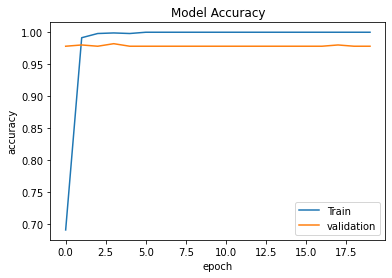

In [ ]:
model.save('fruit10.h5')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='uper left')
plt.show()

In [ ]:
model.load_data('fruit10.h5')

AttributeError: ignored

array([1])

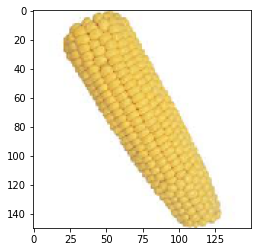

In [ ]:
img = load_img('/content/bap.jpg', target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)